<center><h1>INF-552 Lab 0</h1></center>
<br>
<center><font size="4">Introduction to Basic Development Tools</font></center>

**Name:** Ashraya Geddam Dinesh Babu

**GitHub Username:** Ashraya2505

**USC ID:** 7293401610


### Rules

1. Please read the instructions and problem prompts **carefully**.
2. This lab is to give you some basic APIs of numpy, pandas and scikit-learn. Besides, some topics such as how to make your jupyter notebook be a more efficient developing tools, how to use git and GitHub will also be covered. The lab is to be done individually. You may talk to your fellow classmates about general issues ("Remind me again: Which API should I used for doing group by operation to a data set") but about the specifies of how to do these exercises.
3. Along with a similar vein, you can ask the TA for help, but ask questions about **concepts** but not ask the TA to help you debug your code. The TA is here to help, but not to do the work for you.
4. You are welcome to use the class resources and the Internet.
5. Playing with variations. Solve one problems, and then copy the code to a new cell and play around with it. Doing this is the single most important thing when learning programming.
6. This lab will not be graded but the content is highly related to your future programming assignments. So, treat it wisely.
7. All the content having been gone though in the week 1 discussion is just a snapshot of the most basic concepts. **You need to keep study more about Git, GitHub, Pandas, Numpy and Scikit-Learn in order to finish your programming assignments successfully.**
8. Have fun!

### Setup Development Environment

There are many ways to setup the environment. But, I do recommend a simple idea that is using the Anaconda, which is a pre-build python environment with bundles of useful packages.

**To download the Anaconda, go to the following website:
https://www.anaconda.com/distribution/**. Download the correct version based on your operating system and install it step by step.

Then, **configure your PATH environment variable** to make the conda command work. The following command is an easy way to test whether your configuration is correct. If it is, you will see something as like as the sample output.

> **command:**
>
> conda --version
>
> **sample output:**
>
> conda 4.6.12

**Finally, download this jupyter notebook file,** then change the working directory to where its location in terminal, and type the following command to open the jupter notebook and finish the lab.

> **command:** 
> jupyter notebook

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Pandas

#### The read_csv() Method

First, read the documentation about the *read_csv()* method in Pandas (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). Then, try to read data from file Salaries.csv to a dataframe, make the column playerID in the csv file as the index column and the first row as the header. Also, skip the second row when reading the file.

In [4]:
df = pd.read_csv(
    "../Data/Salaries.csv",
    index_col="playerID",  # set playerID column as index
    header=0,              # first row is header
    skiprows=[1]           # skip the second row
)

print(df.head())

           yearID teamID lgID  salary
playerID                             
bedrost01    1985    ATL   NL  550000
benedbr01    1985    ATL   NL  545000
campri01     1985    ATL   NL  633333
ceronri01    1985    ATL   NL  625000
chambch01    1985    ATL   NL  800000


#### Indexing and Selecting Data

Select the id of the players who are registered in ATL and HOU and whose salary is higher than one million.

In [5]:
player_ids = df[(df["teamID"].isin(["ATL", "HOU"])) & (df["salary"] > 1_000_000)].index.unique()

print(player_ids)

Index(['hornebo01', 'murphda05', 'suttebr01', 'ryanno01', 'griffke01',
       'smithda02', 'clancji01', 'davisgl01', 'ramirra01', 'scottmi03',
       ...
       'simmoan01', 'carmofa01', 'cartech02', 'congeha01', 'gonzama01',
       'gregelu01', 'neshepa01', 'rasmuco01', 'sippto01', 'valbulu01'],
      dtype='object', name='playerID', length=242)


#### The describe() Method

Calculate the standard Deviation, first quartile, medium, third quartile, mean, maximum, minimum of the salary in team ATL.

In [6]:
atl_salaries = df[df["teamID"] == "ATL"]["salary"]

stats = {
    "Standard Deviation": atl_salaries.std(),
    "First Quartile (Q1)": atl_salaries.quantile(0.25),
    "Median (Q2)": atl_salaries.median(),
    "Third Quartile (Q3)": atl_salaries.quantile(0.75),
    "Mean": atl_salaries.mean(),
    "Maximum": atl_salaries.max(),
    "Minimum": atl_salaries.min()
}

print(stats)

{'Standard Deviation': 3434319.605441606, 'First Quartile (Q1)': np.float64(300000.0), 'Median (Q2)': 600000.0, 'Third Quartile (Q3)': np.float64(2400000.0), 'Mean': np.float64(2207749.190960452), 'Maximum': 16061802, 'Minimum': 60000}


#### The iterrows() Method

Create a Python dictionary object whose keys are the headers of the dataframe created in the read_csv() exercise and values are Python list objects that contain data corresponding to the headers. (Here, use the iterrows method to iterate each row of the dataframe and copy it to a dictionary. However, there is a easier way. Learn how the to_dict() method works by yourself later)

In [7]:
data_dict = {col: [] for col in df.columns}  # initialize keys with empty lists

for _, row in df.iterrows():
    for col in df.columns:
        data_dict[col].append(row[col])

print(data_dict.keys())

dict_keys(['yearID', 'teamID', 'lgID', 'salary'])


#### Create Dataframe Using the Constructor

Read the documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame and create a dataframe using pd.DataFrame from the dictionary created in the iterrows() exercise. Change the header to "a", "b", "c", ... at creation time.

In [8]:
n_cols = len(data_dict)

col_names = [chr(97 + i) for i in range(n_cols)]  # 97 = 'a'

df_new = pd.DataFrame(data_dict)

df_new.columns = col_names

print(df_new.head())

      a    b   c       d
0  1985  ATL  NL  550000
1  1985  ATL  NL  545000
2  1985  ATL  NL  633333
3  1985  ATL  NL  625000
4  1985  ATL  NL  800000


### Numpy

Quick start: https://www.numpy.org/devdocs/user/quickstart.html

Numpy axes explaination: https://www.sharpsightlabs.com/blog/numpy-axes-explained/

#### The np.array Method

Example 1:

```python
ls = [1, 2, 3]
arr = np.array(ls)
```

Example 2:
```python
>>> np.array([[1, 2], [3, 4]])
array([[1, 2],
       [3, 4]])
```

Now, create a 2-dimensional Python list object, then convert it to a Numpy array object.

In [9]:
py_list = [
    [10, 20, 30],
    [40, 50, 60]
]

arr = np.array(py_list)

print("Python List:")
print(py_list)
print("\nNumPy Array:")
print(arr)

Python List:
[[10, 20, 30], [40, 50, 60]]

NumPy Array:
[[10 20 30]
 [40 50 60]]


#### ndarray Objects' Attributes

Play with the **ndim, shape, size, dtype, itemsize and data** attribute.

Example:

```python
>>> arr = np.array([[1, 2], [3, 4]])
>>> arr.ndim
2
```

In [10]:
arr = np.array([[1, 2, 3],
                [4, 5, 6]])

print("Array:\n", arr)

print("\nndim   (number of dimensions):", arr.ndim)
print("shape  (rows, columns):", arr.shape)
print("size   (total elements):", arr.size)
print("dtype  (data type of elements):", arr.dtype)
print("itemsize (bytes per element):", arr.itemsize)
print("data   (memory address):", arr.data)

Array:
 [[1 2 3]
 [4 5 6]]

ndim   (number of dimensions): 2
shape  (rows, columns): (2, 3)
size   (total elements): 6
dtype  (data type of elements): int64
itemsize (bytes per element): 8
data   (memory address): <memory at 0x0000019CE3D9B030>


#### Dimension of ndarray Ojects

Play with the reshape() and flatten() method.

Example:
```python
>>> arr = np.array([[1, 2], [3, 4]])
>>> arr.flatten()
array([1, 2, 3, 4])
```

In [11]:
arr = np.array([1, 2, 3, 4, 5, 6])

print("Original Array:")
print(arr)

# Reshape into 2 rows and 3 columns
reshaped = arr.reshape(2, 3)
print("\nReshaped Array (2x3):")
print(reshaped)

# Flatten back to 1D
flattened = reshaped.flatten()
print("\nFlattened Array:")
print(flattened)

Original Array:
[1 2 3 4 5 6]

Reshaped Array (2x3):
[[1 2 3]
 [4 5 6]]

Flattened Array:
[1 2 3 4 5 6]


#### The Slice Operation of ndarray Objects

Understand how the slice operation works for 1-D array and 2-D array.

Example:

```python
>>> arr = np.array([[1, 2, 3], [3, 4, 6], [7, 8, 9]])
>>> arr[1:]
array([[3, 4, 6],
       [7, 8, 9]])
>>> arr[1:, 0:2]
array([[3, 4],
       [7, 8]])
```

In [12]:
arr1 = np.array([10, 20, 30, 40, 50])

print("Original 1D Array:", arr1)

print("arr1[1:]:", arr1[1:]) 

print("arr1[:3]:", arr1[:3])  

print("arr1[::2]:", arr1[::2]) 

arr2 = np.array([[1, 2, 3],
                 [4, 5, 6],
                 [7, 8, 9]])

print("\nOriginal 2D Array:\n", arr2)

print("\narr2[1:]:\n", arr2[1:])

print("\narr2[1:, 0:2]:\n", arr2[1:, 0:2])

print("\narr2[0]:", arr2[0])   

print("arr2[2, 1]:", arr2[2, 1])  


Original 1D Array: [10 20 30 40 50]
arr1[1:]: [20 30 40 50]
arr1[:3]: [10 20 30]
arr1[::2]: [10 30 50]

Original 2D Array:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]

arr2[1:]:
 [[4 5 6]
 [7 8 9]]

arr2[1:, 0:2]:
 [[4 5]
 [7 8]]

arr2[0]: [1 2 3]
arr2[2, 1]: 8


#### The Calculation of ndarray Objects

Play with the **argmin(), argmax(), min(), max(), mean(), sum(), std(), dot(), square(), sqrt(), abs(). exp(), sign(), mod()** method.

Example:

```python
>>> np.square(array)
array([[ 1,  4,  9],
       [ 9, 16, 36],
       [49, 64, 81]])

```

In [13]:
# Sample array
arr = np.array([[1, 2, 3],
                [3, 4, 6],
                [7, 8, 9]])

print("Array:\n", arr)

# --- Basic statistics ---
print("\nmin():", arr.min())         # smallest element
print("max():", arr.max())           # largest element
print("argmin():", arr.argmin())     # index (flattened) of min
print("argmax():", arr.argmax())     # index (flattened) of max
print("mean():", arr.mean())         # average of all elements
print("sum():", arr.sum())           # sum of all elements
print("std():", arr.std())           # standard deviation

# --- Mathematical operations ---
print("\nsquare():\n", np.square(arr))   # element-wise square
print("sqrt():\n", np.sqrt(arr))         # element-wise square root
print("abs():\n", np.abs(arr))           # absolute values
print("exp():\n", np.exp(arr))           # e^x for each element
print("sign():\n", np.sign(arr))         # -1, 0, 1 depending on sign

# --- dot product example ---
v1 = np.array([1, 2, 3])
v2 = np.array([4, 5, 6])
print("\nDot product of v1 and v2:", np.dot(v1, v2))  # 1*4 + 2*5 + 3*6 = 32

# --- modulus ---
print("\nmod():\n", np.mod(arr, 2))   # arr % 2 (remainder after division by 2)

Array:
 [[1 2 3]
 [3 4 6]
 [7 8 9]]

min(): 1
max(): 9
argmin(): 0
argmax(): 8
mean(): 4.777777777777778
sum(): 43
std(): 2.657391276244755

square():
 [[ 1  4  9]
 [ 9 16 36]
 [49 64 81]]
sqrt():
 [[1.         1.41421356 1.73205081]
 [1.73205081 2.         2.44948974]
 [2.64575131 2.82842712 3.        ]]
abs():
 [[1 2 3]
 [3 4 6]
 [7 8 9]]
exp():
 [[2.71828183e+00 7.38905610e+00 2.00855369e+01]
 [2.00855369e+01 5.45981500e+01 4.03428793e+02]
 [1.09663316e+03 2.98095799e+03 8.10308393e+03]]
sign():
 [[1 1 1]
 [1 1 1]
 [1 1 1]]

Dot product of v1 and v2: 32

mod():
 [[1 0 1]
 [1 0 0]
 [1 0 1]]


#### Other Important Methods Inside Module Numpy

Play with the arange(), ones(), zeros(), eye(), linspace(), concatenate() method.

Example:

```python
>>> np.eye(3)
array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])
```

In [14]:
# --- arange(): create sequences ---
print("arange(0, 10, 2):", np.arange(0, 10, 2))
# [0 2 4 6 8]

# --- ones(): array full of 1s ---
print("\nones((2,3)):\n", np.ones((2,3)))
# 2x3 matrix of 1s

# --- zeros(): array full of 0s ---
print("\nzeros((3,2)):\n", np.zeros((3,2)))
# 3x2 matrix of 0s

# --- eye(): identity matrix ---
print("\neye(3):\n", np.eye(3))
# 3x3 identity matrix

# --- linspace(): evenly spaced numbers ---
print("\nlinspace(0, 1, 5):", np.linspace(0, 1, 5))
# 5 points between 0 and 1 (inclusive)

# --- concatenate(): combine arrays ---
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

print("\nconcatenate([a, b]):", np.concatenate([a, b]))
# [1 2 3 4 5 6]

# Concatenate along axis for 2D arrays
m1 = np.array([[1, 2], [3, 4]])
m2 = np.array([[5, 6]])

print("\nconcatenate([m1, m2], axis=0):\n", np.concatenate([m1, m2], axis=0))

print("\nconcatenate([m1, m1], axis=1):\n", np.concatenate([m1, m1], axis=1))



arange(0, 10, 2): [0 2 4 6 8]

ones((2,3)):
 [[1. 1. 1.]
 [1. 1. 1.]]

zeros((3,2)):
 [[0. 0.]
 [0. 0.]
 [0. 0.]]

eye(3):
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

linspace(0, 1, 5): [0.   0.25 0.5  0.75 1.  ]

concatenate([a, b]): [1 2 3 4 5 6]

concatenate([m1, m2], axis=0):
 [[1 2]
 [3 4]
 [5 6]]

concatenate([m1, m1], axis=1):
 [[1 2 1 2]
 [3 4 3 4]]


### Scikit-Learn

The followings are packages (or methods) in Python (Scikit-Learn and Scipy) that will be frequently used in your programming assignment. So, please read carefully.

- Data Preprocessing (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)
    - Standardization: StandardScaler
    - Normalization: MinMaxScaler
    - Quantifing Categorical Features: LabelEncoder. OneHotEncoder
    - Construct Train and Test Set: model_selection.train_test_split
- KNN: KNeighborsClassifier
- Linear Regression: LinearRegression
- Logistic Regression: LogisticRegression, LogisticRegressionCV
- Feature Selection / Model Selection
    - L1 Penalized Regression (Lasso Regression) with Cross-Validation: LassoCV
    - L2 Penalized Regression (Ridge Regression) with Cross-Validation: RidgeCV
    - Cross-Validation: StratifiedKFold, RepeatedKFold, LeaveOneOut, KFold, model_selection.cross_validate, model_selection.cross_val_predict, model_selection.cross_val_score
    - Model Metrics (https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics): accuracy_score, auc, f1_score, hamming_loss, precision_score, recall_score, roc_auc_score
- Decision Tree: DecisionTreeClassifier, DecisionTreeRegressor
- Bootstrap, Ensemble Methods
    - Bootstrap: bootstrapped (https://pypi.org/project/bootstrapped/)
    - Bagging: RandomForestClassifier, RandomForestRegressor
    - Boosting: AdaBoostClassifier, AdaBoostRegressor
- Support Vector Machines (https://scikit-learn.org/stable/modules/svm.html#svm): LinearSVC, LinearSVR
- Multiclass and Multilabel Classification (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.multiclass)
    - One-vs-one Multiclass Strategy: OneVsOneClassifier
    - One-vs-the-rest (OvR) multiclass/multilabel strategy / OneVsRestClassifier
- Unsupervised Learning
    - K-means Clustering: KMeans
    - Hierarchical Clustering: scipy.cluster.hierarchy (not scikit-learn)
- Semisupervised Learning (https://scikit-learn.org/stable/modules/label_propagation.html)

### Matplotlib

**Quick start:** https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html

**Exercises:**

(a) Create two one dimensional arrays x and y and plot y vs x, add title, xlabel, ylabel, grid.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y = np.array([j ** 2 for j in x])
```

copy the code above to the following cell and add code for plotting the parabola.

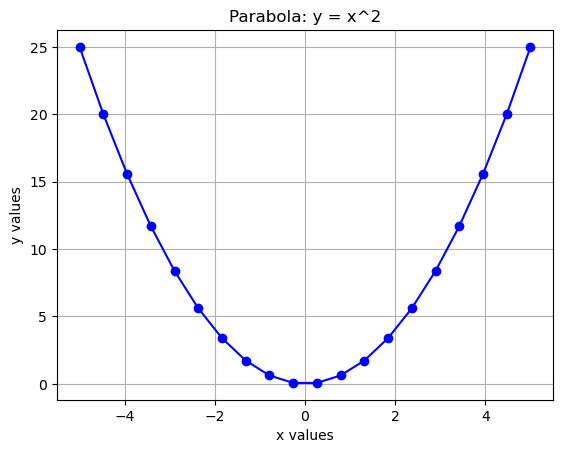

In [15]:
# Data
x = np.linspace(-5, 5, num=20)
y = np.array([j ** 2 for j in x])

# Plot parabola
plt.plot(x, y, marker="o", color="b", linestyle="-")

# Add title and labels
plt.title("Parabola: y = x^2")
plt.xlabel("x values")
plt.ylabel("y values")

# Add grid
plt.grid(True)

# Show plot
plt.show()

What happens if the independent variable is not sorted before plotting? Try plotting directly using the following defined array.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
np.random.shuffle(x)
y = np.array([j ** 2 for j in x])
```

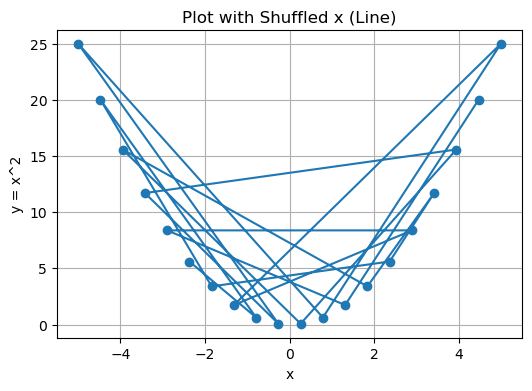

In [16]:
# Define x and shuffle
x = np.linspace(-5, 5, num=20)
np.random.shuffle(x)   # shuffle the independent variable
y = np.array([j ** 2 for j in x])

plt.figure(figsize=(6,4))
plt.plot(x, y, marker="o")
plt.title("Plot with Shuffled x (Line)")
plt.xlabel("x")
plt.ylabel("y = x^2")
plt.grid(True)
plt.show()

(b) Create multiple arrays and plot them with different styles, add legends, add text/mathematical equations on the plot.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])
```

copy the code above to the following cell and add code for plotting curve $\left(x, y1\right)$, $\left(x, y2\right)$ and $\left(x, y3\right)$.

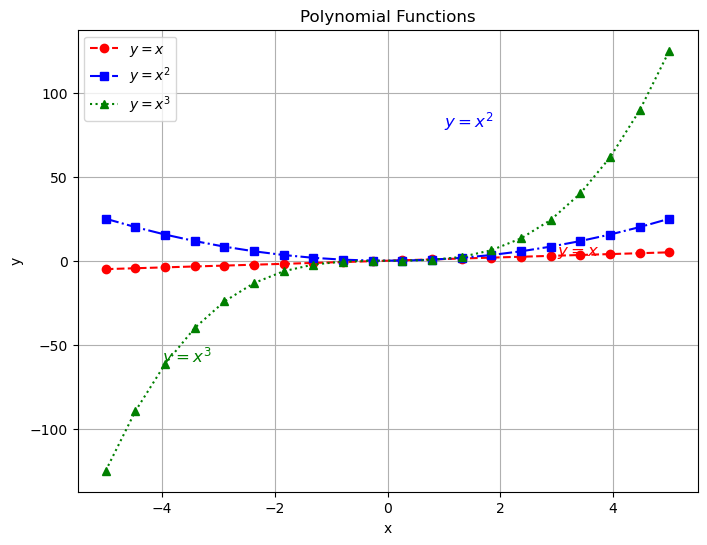

In [17]:
# Data
x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])        # y = x
y2 = np.array([j ** 2 for j in x])   # y = x^2
y3 = np.array([j ** 3 for j in x])   # y = x^3

# Plot
plt.figure(figsize=(8,6))

# Different styles
plt.plot(x, y1, 'r--o', label=r"$y = x$")       # red dashed with circles
plt.plot(x, y2, 'b-.s', label=r"$y = x^2$")     # blue dash-dot with squares
plt.plot(x, y3, 'g:^', label=r"$y = x^3$")      # green dotted with triangles

# Add labels, grid, and title
plt.xlabel("x")
plt.ylabel("y")
plt.title("Polynomial Functions")
plt.grid(True)

# Add legend
plt.legend()

# Add text / equation annotation inside the plot
plt.text(1, 80, r"$y = x^2$", fontsize=12, color="blue")
plt.text(-4, -60, r"$y = x^3$", fontsize=12, color="green")
plt.text(3, 3, r"$y = x$", fontsize=12, color="red")

# Show plot
plt.show()

(c) Create multiple arrays and plot them into one figure **(No multiple figure and no subplot is allowed in this question)**.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])
```

copy the code above to the following cell and add code for plotting curve $\left(x, y1\right)$, $\left(x, y2\right)$ and $\left(x, y3\right)$.

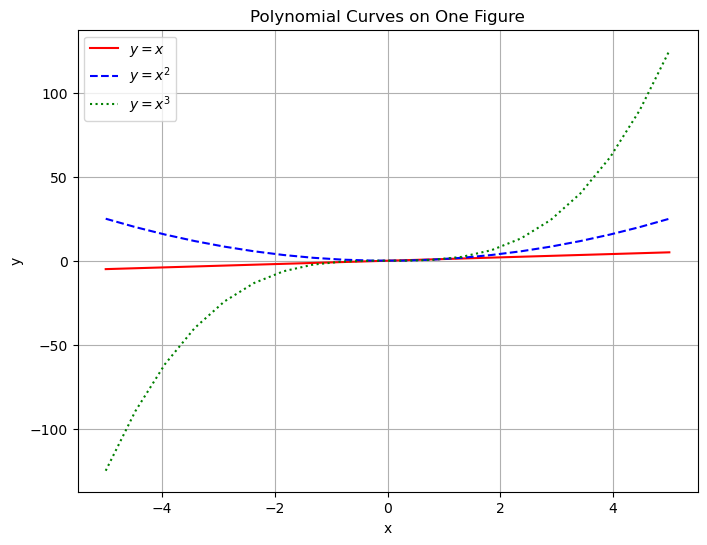

In [18]:
# Data
x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])        # y = x
y2 = np.array([j ** 2 for j in x])   # y = x^2
y3 = np.array([j ** 3 for j in x])   # y = x^3

# Single figure, single axes
plt.figure(figsize=(8,6))

plt.plot(x, y1, 'r-', label=r"$y = x$")
plt.plot(x, y2, 'b--', label=r"$y = x^2$")
plt.plot(x, y3, 'g:', label=r"$y = x^3$")

# Labels, title, grid
plt.xlabel("x")
plt.ylabel("y")
plt.title("Polynomial Curves on One Figure")
plt.grid(True)

# Legend
plt.legend()

# Show plot
plt.show()

(d) Create multiple subplots, play around with the figure size, figure title, and its font style and font size **(One curve is plotted in one subplot in this question)**.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])
```

copy the code above to the following cell and add code for plotting curve $\left(x, y1\right)$, $\left(x, y2\right)$ and $\left(x, y3\right)$.

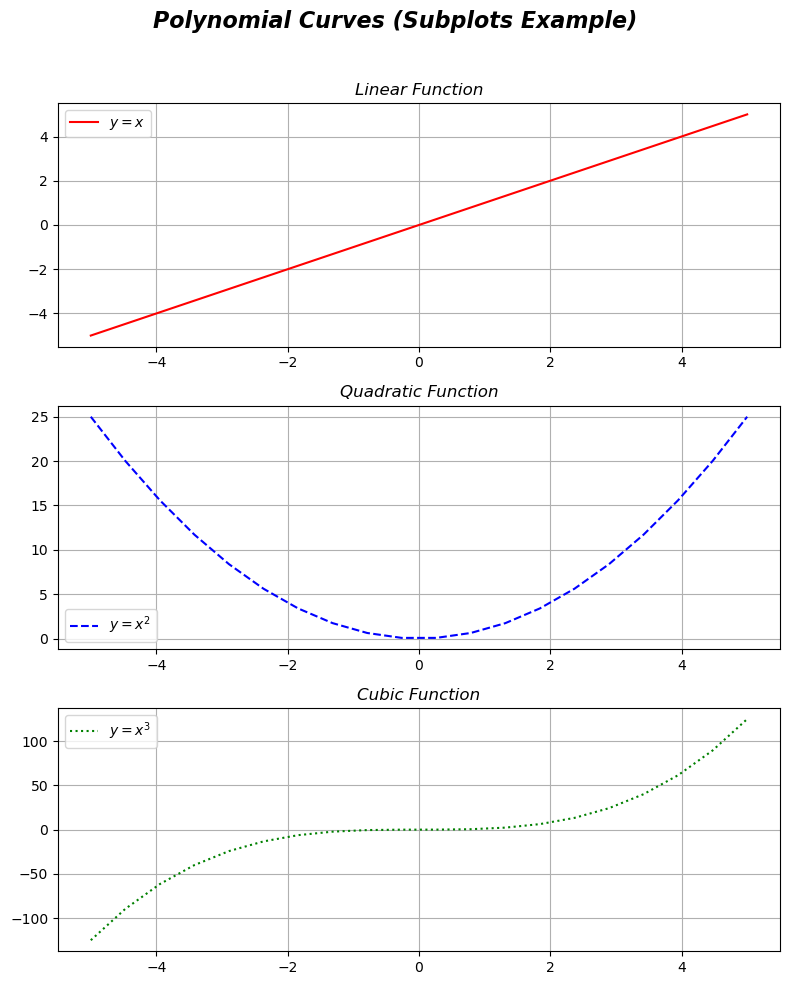

In [19]:
# Data
x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])        # y = x
y2 = np.array([j ** 2 for j in x])   # y = x^2
y3 = np.array([j ** 3 for j in x])   # y = x^3

# Create subplots (3 rows, 1 column)
fig, axes = plt.subplots(3, 1, figsize=(8, 10))

# Plot each curve on its own subplot
axes[0].plot(x, y1, 'r-', label=r"$y = x$")
axes[0].set_title("Linear Function", fontsize=12, fontstyle='italic')
axes[0].grid(True)
axes[0].legend()

axes[1].plot(x, y2, 'b--', label=r"$y = x^2$")
axes[1].set_title("Quadratic Function", fontsize=12, fontstyle='italic')
axes[1].grid(True)
axes[1].legend()

axes[2].plot(x, y3, 'g:', label=r"$y = x^3$")
axes[2].set_title("Cubic Function", fontsize=12, fontstyle='italic')
axes[2].grid(True)
axes[2].legend()

# Add common labels
fig.suptitle("Polynomial Curves (Subplots Example)", fontsize=16, fontweight='bold', fontstyle='oblique')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show plot
plt.show()

(e) Change the limits on x and y axes, **use logarithmic axes to plot**.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y = np.array([j ** 2 for j in x])
```

copy the code above to the following cell and add code for plotting the parabola.

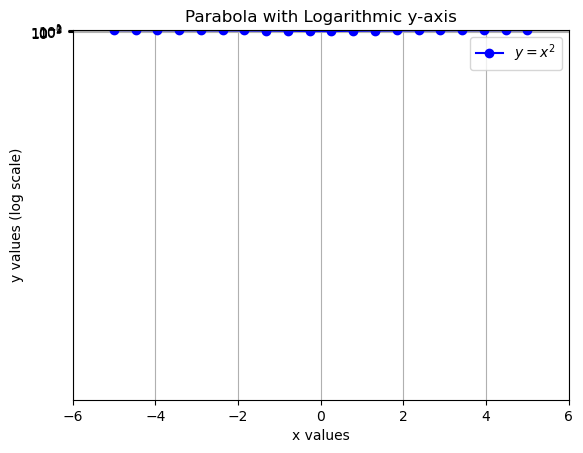

In [20]:
# Data
x = np.linspace(-5, 5, num=20)
y = np.array([j ** 2 for j in x])

# Plot parabola
plt.plot(x, y, marker="o", linestyle="-", color="b", label=r"$y = x^2$")

# Set axis limits
plt.xlim(-6, 6)   # extend a bit beyond data range
plt.ylim(0, 30)   # restrict y values

# Logarithmic scaling (only works for positive values)
plt.yscale("log")

# Labels and title
plt.xlabel("x values")
plt.ylabel("y values (log scale)")
plt.title("Parabola with Logarithmic y-axis")
plt.legend()
plt.grid(True)

# Show plot
plt.show()


### Pandas's DataFrame.plot and Seaborn

#### Pandas's DataFrame.plot

Use the Salaries.csv again (You can use the dataframe object loaded from section 3.1).

(a) For team 'ATL', plot a scatter plot between feature yearID and salary.

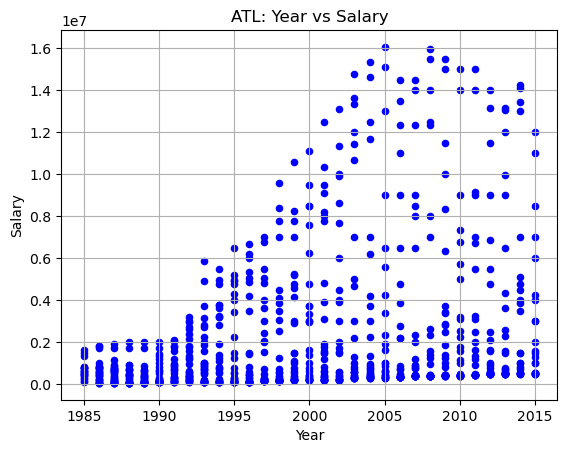

In [21]:
# Filter for team 'ATL'
atl_df = df[df["teamID"] == "ATL"]

# Scatter plot: yearID vs salary
atl_df.plot.scatter(x="yearID", y="salary", color="blue", title="ATL: Year vs Salary")

plt.xlabel("Year")
plt.ylabel("Salary")
plt.grid(True)
plt.show()

(b) For year 1985, plot a bar chart to show the average salary for each team.

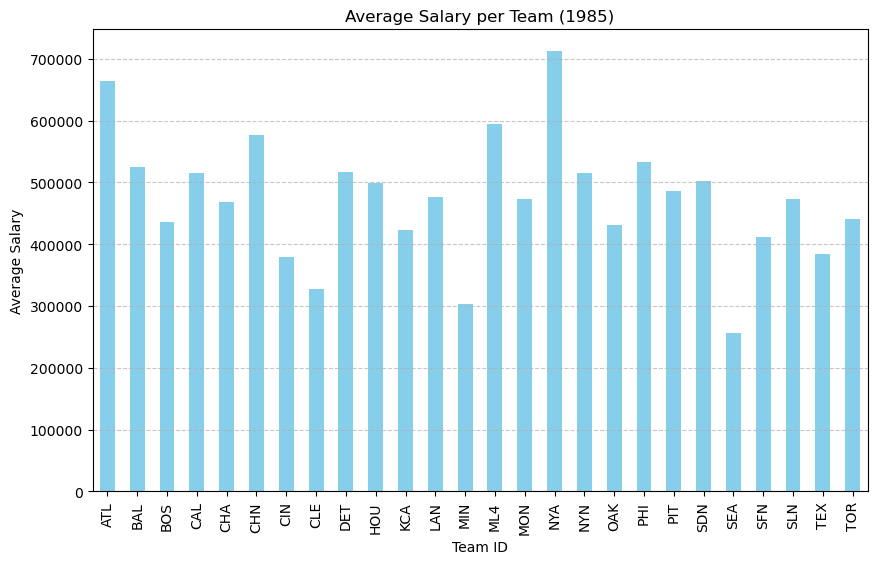

In [22]:
# Filter for year 1985
df_1985 = df[df["yearID"] == 1985]

# Compute average salary per team
avg_salary_per_team = df_1985.groupby("teamID")["salary"].mean()

# Plot bar chart
avg_salary_per_team.plot.bar(
    figsize=(10,6),
    color="skyblue",
    title="Average Salary per Team (1985)"
)

plt.xlabel("Team ID")
plt.ylabel("Average Salary")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


(c) For team 'ATL', plot a line chart to show how the annual average salary change by years.

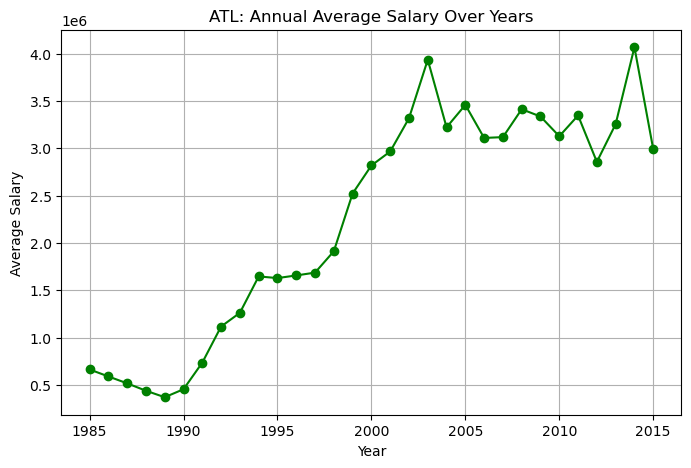

In [23]:
atl_df = df[df["teamID"] == "ATL"]

atl_avg_salary = atl_df.groupby("yearID")["salary"].mean()

atl_avg_salary.plot(
    kind="line",
    marker="o",
    figsize=(8,5),
    color="green",
    title="ATL: Annual Average Salary Over Years"
)

plt.xlabel("Year")
plt.ylabel("Average Salary")
plt.grid(True)
plt.show()

#### Seaborn

(a) Append one more numeric feature to the data frame (can be generated randomly), then for team 'ATL', use the seaborn.pairplot to plot scatter plots among all numeric features in the data frame for team. 

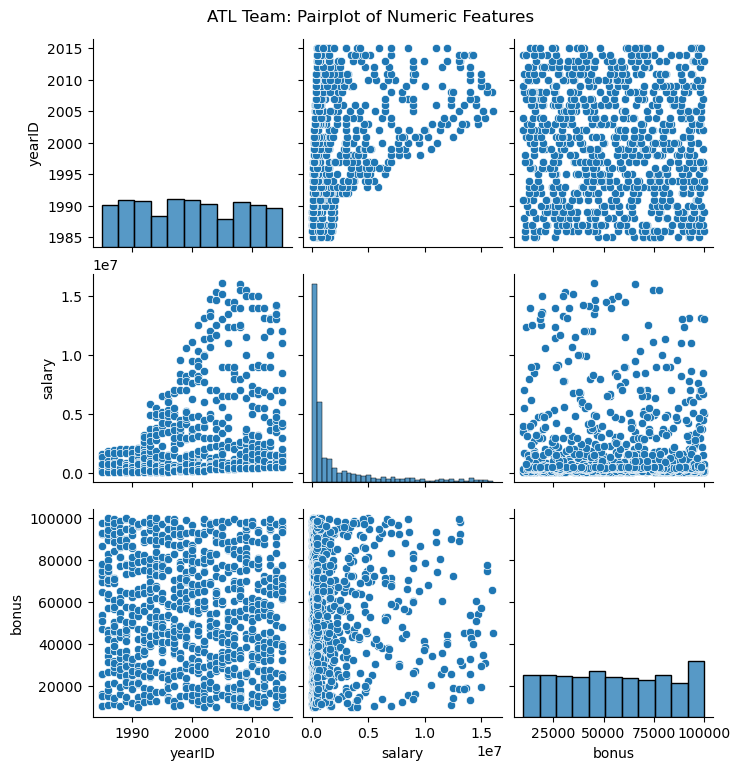

In [24]:
np.random.seed(42)  
df["bonus"] = np.random.randint(10000, 100000, size=len(df))

atl_df = df[df["teamID"] == "ATL"]

sns.pairplot(atl_df.select_dtypes(include=[np.number]))
plt.suptitle("ATL Team: Pairplot of Numeric Features", y=1.02)
plt.show()

(b) For year 1985 and for each team, plot a boxplot to show how the salary distribute within a team.

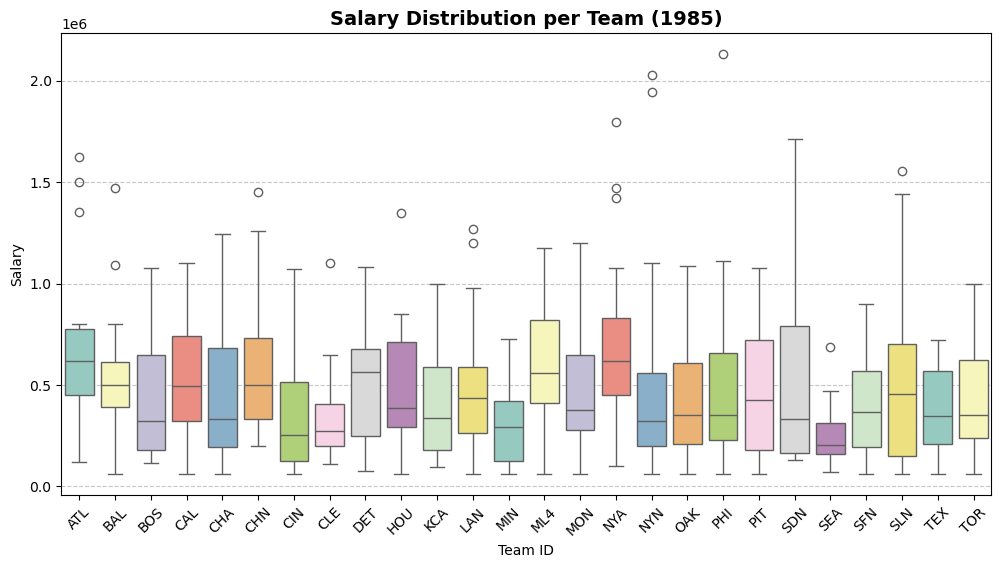

In [25]:
df_1985 = df[df["yearID"] == 1985]

plt.figure(figsize=(12,6))
sns.boxplot(
    x="teamID", 
    y="salary", 
    hue="teamID",  
    data=df_1985, 
    palette="Set3", 
    legend=False
)

plt.title("Salary Distribution per Team (1985)", fontsize=14, fontweight="bold")
plt.xlabel("Team ID")
plt.ylabel("Salary")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

(c) Read the offical documentation (https://seaborn.pydata.org/) to understand how lmplot, catplot, relplot, and jointplot works.

### Jupyter Notebook

#### Jupyter Notebook Extensions

Extensions such as the code formatter, table of content is to make your development more efficient. To explore it, please refer to https://github.com/ipython-contrib/jupyter_contrib_nbextensions.

#### Jupyter Visual Debugger

The Pixie Debugger is a visual debugger for debugging on Jupyter Notebook. To explore it, please refer to https://medium.com/codait/the-visual-python-debugger-for-jupyter-notebooks-youve-always-wanted-761713babc62.

### Git and GitHub

1. In the directory that where this jupyter notebook file locates in, init a Git repository.
2. Checkout a new branch called dev and commit the current notebook within this branch.
3. Merge the dev branch to the master branch (the default branch).
4. Create a temporary repository (just for practicing and you can delete it later) in GitHub. 
5. Push new changes in the master branch to the remote repository created in step 4.
6. Checkout the dev branch again and do some changes to your notebook, and then repeat step 3 and step 5.